### XOR logic gate implementation using tensorflow 

#### import the package and the data

In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

X_data = [[0.0, 0.0, 1.0, 1.0], [0.0, 1.0, 0.0, 1.0]]
Y_data = [[0.0, 1.0, 1.0, 0.0]]

tf.reset_default_graph()

#### create a placeholder for input , output and weight

In [22]:
X = tf.placeholder('float', shape = [2 ,4], name = 'INPUT') 
Y = tf.placeholder('float', shape = [1,4], name = 'OUTPUT')

W1 = tf.Variable(tf.random_uniform([3,2], maxval=1) ,'float', name = 'weight_1_to_2' )
b1 = tf.Variable(tf.random_uniform([3,1], maxval=1), 'float', name = 'bias_1_to_2')

W2 = tf.Variable(tf.random_uniform([1,3], maxval=1), 'float', name = 'weight_2_to_3')
b2 = tf.Variable(tf.random_uniform([1,1], maxval=1), 'float', name = 'bias_2_to_3')

#### For fast convergence use

In [23]:
W1_velocity = tf.Variable(tf.zeros([3,2]), 'float')
b1_velocity = tf.Variable(tf.zeros([3,1]), 'float')
                          
W2_velocity = tf.Variable(tf.zeros([1,3]), 'float')
b2_velocity = tf.Variable(tf.zeros([1,1]), 'float')
                          
momentum = 0.9

#### Forward propagation and backward propagation

In [24]:
a1 = X

z2 = tf.matmul(W1,a1) + b1
a2 = tf.sigmoid(z2, name = 'Hidden_layer')

z3 = tf.matmul(W2,a2) + b2
a3 = tf.sigmoid(z3, name = 'Predicted_output')

dz3 = tf.subtract(a3, Y) 

temp = tf.matmul(tf.transpose(W2), dz3)
temp2 = tf.multiply(a2, (1 - a2))

dz2 = tf.multiply(temp, temp2)

dw2 = tf.matmul(dz3, tf.transpose(a2))
db2 = tf.reduce_sum(dz3, keep_dims = True)

dw1 = tf.matmul(dz2, tf.transpose(a1))
db1 = tf.reduce_sum(dz2,axis = 1, keep_dims = True)


#### update the weight and calculate the cost

In [25]:
assign_op1 = W1.assign_sub(0.1 * dw1)
assign_op2 = b1.assign_sub(0.1 * db1)

assign_op3 = W2.assign_sub(0.1 * dw2)
assign_op4 = b2.assign_sub(0.1 * db2)

cost =-tf.reduce_sum(Y * tf.log(a3) + (1 - Y) * tf.log(1 - a3))

iteration_cost = []

#### Train our model

In [26]:
with tf.Session() as sess:
    sess.run(W1.initializer)
    sess.run(b1.initializer)
    sess.run(W2.initializer)
    sess.run(b2.initializer)
    writer = tf.summary.FileWriter("./graphs", sess.graph)
    for i in range(6000):
        sess.run(assign_op4, {X:X_data, Y:Y_data })
        sess.run(assign_op3, {X:X_data, Y:Y_data})
        sess.run(assign_op2, {X:X_data, Y:Y_data})
        sess.run(assign_op1, {X:X_data, Y:Y_data})
        iteration_cost.append(sess.run(cost, {X:X_data, Y:Y_data}))
    W1_test = W1.eval()
    b1_test = b1.eval()
    
    W2_test = W2.eval()
    b2_test = b2.eval()
    print(sess.run(Y, {X:X_data, Y:Y_data}))

[[ 0.  1.  1.  0.]]


In [27]:
print(W1_test)
print(b1_test) 
print(W2_test)
print(b2_test)

[[ 4.83404303  4.82894611]
 [ 7.31801176  7.3225646 ]
 [ 2.20907235  2.21550775]]
[[-7.47917652]
 [-3.40275168]
 [-3.62798762]]
[[-10.69829082  12.71001053  -4.85359859]]
[[-5.30940199]]


#### plot the cost over iteration

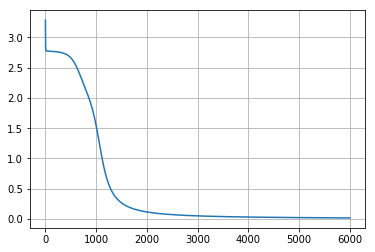

In [28]:
plt.plot(iteration_cost)
plt.show()

#### Test our model and print accuracy

In [29]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [30]:
test_count = 5
x_da = np.array(X_data)
y_da = np.array(Y_data)
total_data = 0
correct_data = 0
for i in range(test_count):
    count = 0;
    for x in x_da.T:
        x = x + np.random.uniform(-0.5,0.5 ,[1,2])
        a1 = x.T

        z2 = np.matmul(W1_test,a1) + b1_test
        a2 = sigmoid(z2)

        z3 = np.matmul(W2_test,a2) + b2_test
        a3 = sigmoid(z3)

        if (abs(y_da[0,count]- a3) < 0.5):
            correct_data = correct_data + 1
        print(y_da[0,count], a3)
        count = count +1
        total_data = total_data + 1

print(correct_data / total_data)    

0.0 [[ 0.37776599]]
1.0 [[ 0.19726815]]
1.0 [[ 0.9830351]]
0.0 [[ 0.00259556]]
0.0 [[ 0.97679364]]
1.0 [[ 0.99600706]]
1.0 [[ 0.96300555]]
0.0 [[ 0.0214843]]
0.0 [[ 0.00533788]]
1.0 [[ 0.99559111]]
1.0 [[ 0.54907776]]
0.0 [[ 0.00108546]]
0.0 [[ 0.00603658]]
1.0 [[ 0.99639216]]
1.0 [[ 0.99186705]]
0.0 [[ 0.00110486]]
0.0 [[ 0.95873587]]
1.0 [[ 0.03261231]]
1.0 [[ 0.21240742]]
0.0 [[ 0.00708942]]
0.75


#### Decision boundary

In [31]:
boundary = []

for i in np.linspace(-1,2,200):
    for j in np.linspace(-1,2,200):
        a1 = [[i],[j]]
        
        z2 = np.matmul(W1_test,a1) + b1_test
        a2 = sigmoid(z2)

        z3 = np.matmul(W2_test,a2) + b2_test
        a3 = sigmoid(z3)
        
        if (a3 > 0.45) and (a3 < 0.55):
            boundary.append([i,j])

            

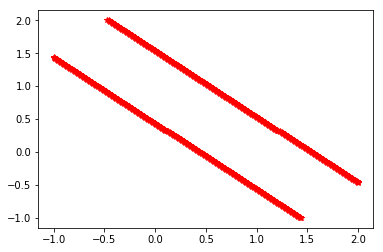

(654, 2)


In [32]:
value = np.array(boundary)
plt.plot(value[:,0], value[:,1], 'r*')
plt.show()
print(value.shape)

In [36]:
a1 = [[1],[1]]
    
z2 = np.matmul(W1_test,a1) + b1_test
a2 = sigmoid(z2)

z3 = np.matmul(W2_test,a2) + b2_test
a3 = sigmoid(z3)

print(a3)

[[ 0.00383266]]
